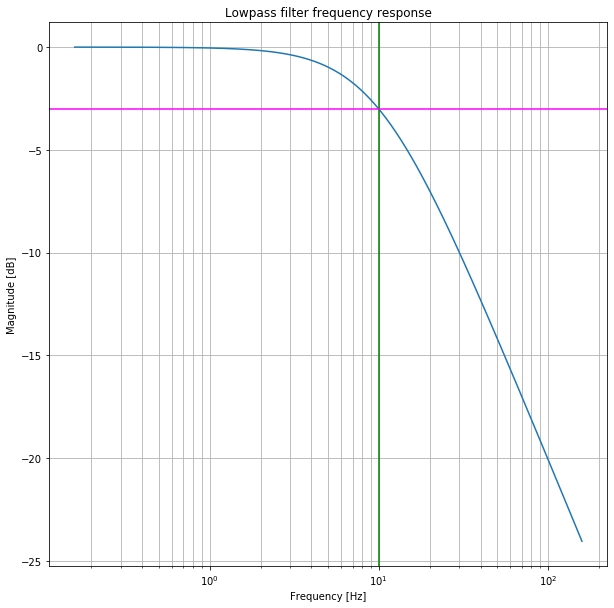

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
from scipy import signal

# cutoff frequency in Hz
fc = 10
# cutoff frequency in rad/s
wc = fc*2*np.pi

# Butterworth filter, first order, cutoff, lowpass, analog filter
b, a = signal.butter(1, wc, 'lp', analog=True)

# Compute transfer function h for different w
w, h = signal.freqs(b, a)

# Plot Bode Freq-response in dB
plt.rcParams['figure.figsize'] = [10, 10]
plt.semilogx(w/2/np.pi, 20 * np.log10(abs(h)))
plt.title('Lowpass filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(wc/2/np.pi, color='green')  # cutoff frequency
plt.axhline(-3, color='magenta')        # -3dB gain
plt.show()


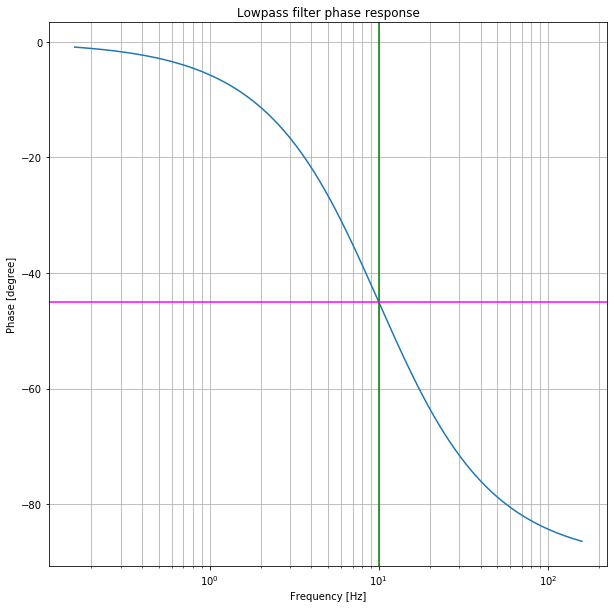

In [2]:
# Plot Bode Phase-shift in deg
plt.semilogx(w/2/np.pi, np.angle(h, deg=True))
plt.title('Lowpass filter phase response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degree]')
plt.grid(which='both', axis='both')
plt.axvline(wc/2/np.pi, color='green') # cutoff frequency
plt.axhline(-45, color='magenta')      # 45 deg line
plt.show()

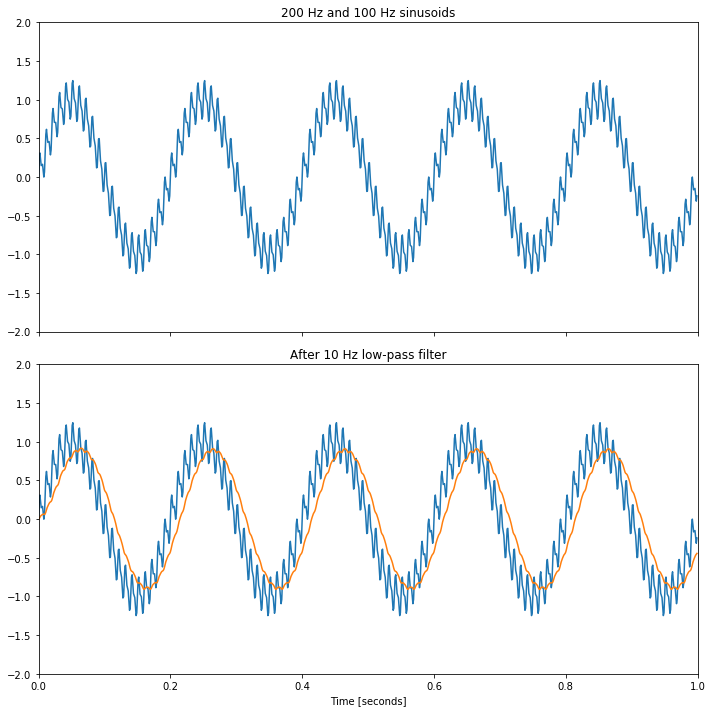

In [3]:
# Sample rate in Hz
fs = 1000 
# Sample timestamps
t = np.linspace(0, 1, fs, False)  # 1 second

# Three random frequencies
f1 = 200
f2 = 100
f3 = 5

# generate signal with diff. freq and amplitudes
sig = 0.1*np.sin(2*np.pi*f1*t) + 0.2*np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

# plot raw signal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title(str(f1)+' Hz and '+str(f2)+' Hz sinusoids')
ax1.axis([0, 1, -2, 2])

# filter raw signal
sos = signal.butter(1, fc, 'low', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)

# filter filtered signal
ax2.plot(t, sig)
ax2.plot(t, filtered)
ax2.set_title('After '+str(fc)+' Hz low-pass filter')
ax2.set_xlabel('Time [seconds]')
ax2.axis([0, 1, -2, 2])
plt.tight_layout()
plt.show()

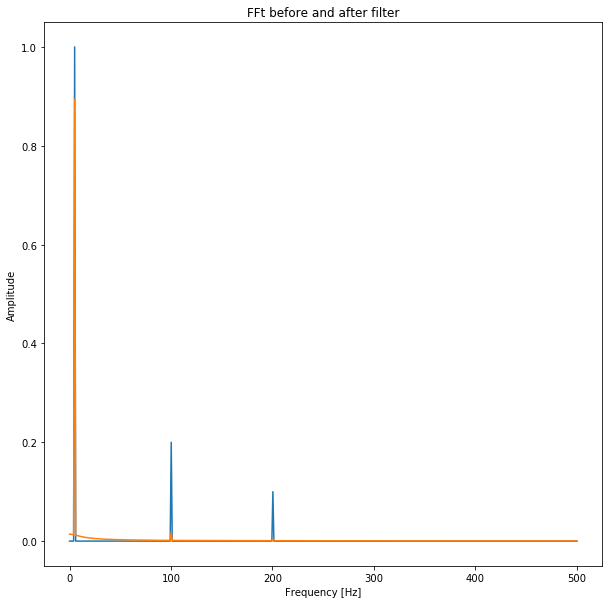

In [5]:
# Compute (Fast) Fourier Transform of raw and filtered signal
N = fs          # Number of samplepoints
T = 1.0 / fs    # sample spacing
x = np.linspace(0.0, N*T, N)
yf = scipy.fftpack.fft(sig)
yf_fil = scipy.fftpack.fft(filtered)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

# Plot FFT results
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.plot(xf, 2.0/N * np.abs(yf_fil[:N//2]))
ax.set_title('FFt before and after filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
plt.show()